In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [2]:
img_width = 96
img_height = 96
img_channels = 1

batch_size = 128
epochs = 5

# NOSE_TIP_DETECTION

In [12]:
df = pd.read_csv(r'Temp1_facial-keypoints-detection.zip\training.zip')
images = df.pop("Image")
y = df[['nose_tip_x' , 'nose_tip_y']].values
print(df.shape)
df.head()

(7049, 30)


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [19]:
images = np.array([[ float(pixel) for pixel in image.split()] for image in images])

In [23]:
images = images.reshape(-1 , img_height , img_width , img_channels)

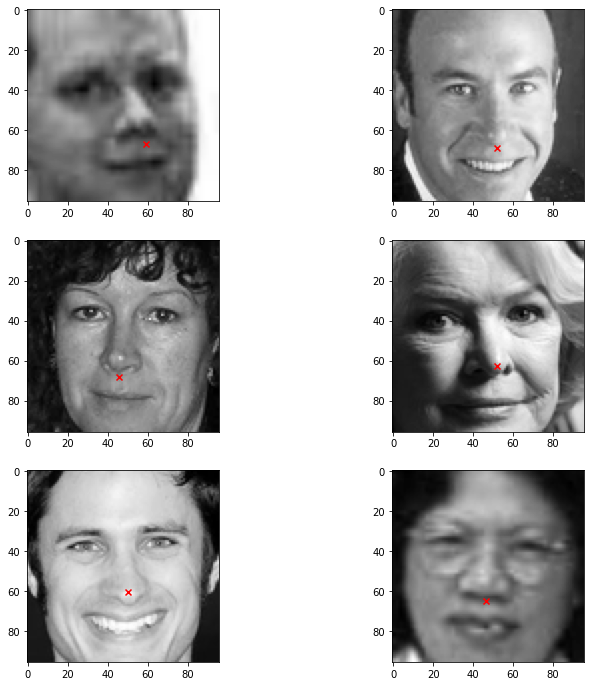

In [28]:
fig , ax = plt.subplots(3,2,figsize = (12,12))

for i in range(3):
    for j in range(2):
        idx = np.random.randint(len(images))
        ax[i][j].imshow(images[idx] , cmap = 'gray')
        ax[i][j].scatter(y[idx][0] , y[idx][1] , color = 'r' ,marker = 'x')
# fig.show()

In [29]:
images = images/255.0
y = y/96.0

In [38]:
model = keras.Sequential()
model.add(keras.layers.Input(images.shape[1:]))
model.add(keras.layers.Conv2D(filters = 20 , kernel_size = (3,3) , strides = (2,2) , activation = 'relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(filters = 40 , kernel_size = 3 , strides = 2 , activation = 'relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(2)) 

model.compile(loss = 'mse' , optimizer = tf.keras.optimizers.Adam(1e-3))
          
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 47, 47, 20)        200       
_________________________________________________________________
batch_normalization_6 (Batch (None, 47, 47, 20)        80        
_________________________________________________________________
dropout_6 (Dropout)          (None, 47, 47, 20)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 23, 23, 40)        7240      
_________________________________________________________________
batch_normalization_7 (Batch (None, 23, 23, 40)        160       
_________________________________________________________________
dropout_7 (Dropout)          (None, 23, 23, 40)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 21160)            

In [40]:
model.fit(images , y , batch_size = batch_size , epochs = epochs , validation_split = 0.15) 

Epoch 1/5
47/47 [==============================] - 3s 70ms/step - loss: 0.5941 - val_loss: 0.0282
Epoch 2/5
47/47 [==============================] - 2s 35ms/step - loss: 0.4519 - val_loss: 0.0323
Epoch 3/5
47/47 [==============================] - 2s 34ms/step - loss: 0.3713 - val_loss: 0.0505
Epoch 4/5
47/47 [==============================] - 2s 34ms/step - loss: 0.3379 - val_loss: 0.0784
Epoch 5/5
47/47 [==============================] - 2s 34ms/step - loss: 0.3241 - val_loss: 0.0628


In [45]:
test_df = pd.read_csv(r'C:\Users\hrushikesh gowda\AppData\Local\Temp\Temp1_facial-keypoints-detection.zip\test.zip')
test_images = test_df.pop("Image")
test_images = np.array([[ float(pixel) for pixel in image.split()] for image in test_images])
test_images = test_images.reshape(-1 , img_height , img_width , img_channels)

In [46]:
test_preds  = model.predict(test_images / 255.0) * 96.0  # since we divided y by 96

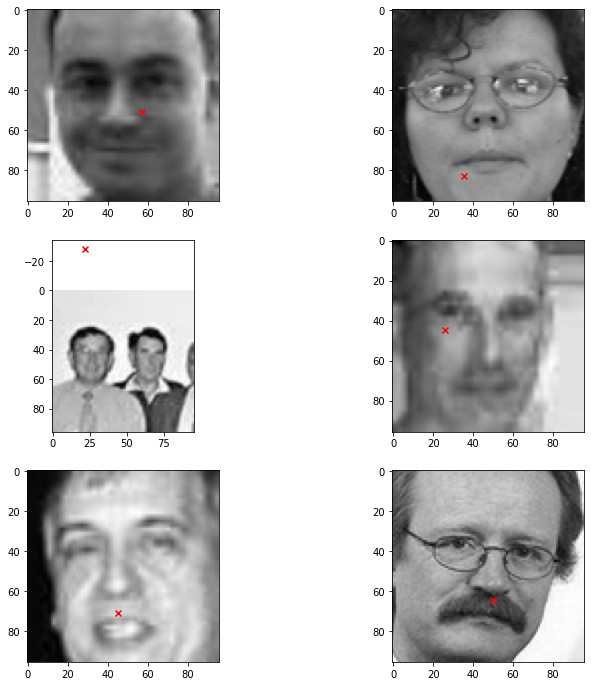

In [47]:
fig , ax = plt.subplots(3,2,figsize = (12,12))

for i in range(3):
    for j in range(2):
        idx = np.random.randint(len(test_images))
        ax[i][j].imshow(test_images[idx] , cmap = 'gray')
        ax[i][j].scatter(test_preds[idx][0] , test_preds[idx][1] , color = 'r' ,marker = 'x')
# fig.show()

In [48]:
model = keras.Sequential()
model.add(keras.layers.Input(images.shape[1:]))
model.add(keras.layers.Conv2D(filters = 20 , kernel_size = (3,3) , strides = (2,2) , activation = 'relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(filters = 40 , kernel_size = 3 , strides = 2 , activation = 'relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(2 , activation = 'sigmoid'))  # since my y values are between 0 and 1

model.compile(loss = 'mse' , optimizer = tf.keras.optimizers.Adam(1e-3))
          
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 47, 47, 20)        200       
_________________________________________________________________
batch_normalization_8 (Batch (None, 47, 47, 20)        80        
_________________________________________________________________
dropout_8 (Dropout)          (None, 47, 47, 20)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 23, 23, 40)        7240      
_________________________________________________________________
batch_normalization_9 (Batch (None, 23, 23, 40)        160       
_________________________________________________________________
dropout_9 (Dropout)          (None, 23, 23, 40)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 21160)            

In [49]:
model.fit(images , y , batch_size = batch_size , epochs = epochs , validation_split = 0.15) 

Epoch 1/5
47/47 [==============================] - 4s 44ms/step - loss: 0.0743 - val_loss: 0.0132
Epoch 2/5
47/47 [==============================] - 2s 35ms/step - loss: 0.0559 - val_loss: 0.0181
Epoch 3/5
47/47 [==============================] - 2s 33ms/step - loss: 0.0486 - val_loss: 0.0149
Epoch 4/5
47/47 [==============================] - 2s 34ms/step - loss: 0.0402 - val_loss: 0.0059
Epoch 5/5
47/47 [==============================] - 2s 34ms/step - loss: 0.0300 - val_loss: 0.0075


In [50]:
test_preds  = model.predict(test_images / 255.0) * 96.0  # since we divided y by 96

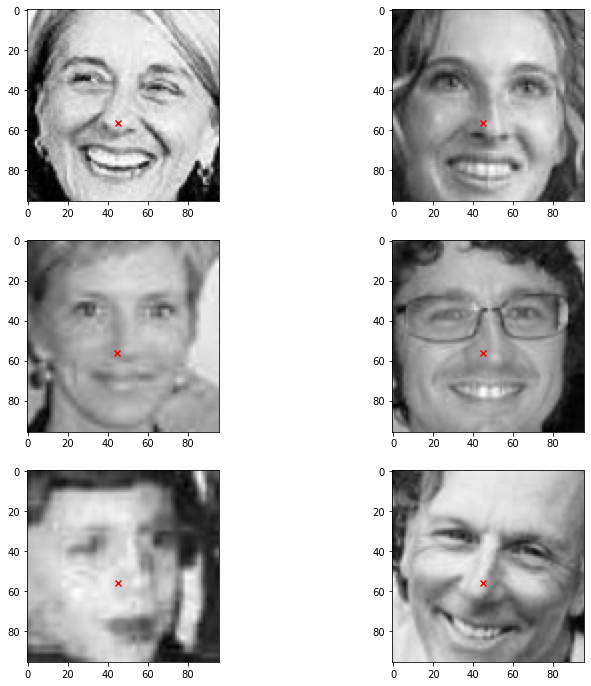

In [51]:
fig , ax = plt.subplots(3,2,figsize = (12,12))

for i in range(3):
    for j in range(2):
        idx = np.random.randint(len(test_images))
        ax[i][j].imshow(test_images[idx] , cmap = 'gray')
        ax[i][j].scatter(test_preds[idx][0] , test_preds[idx][1] , color = 'r' ,marker = 'x')
# fig.show()